# User guide for plotting Conformal Prediction metrics


In [1]:
# Make sure to add the code to your PYTHONPATH
import sys
sys.path.append('src')
from pharmbio.cp import metrics, plotting

Using Seaborn plotting defaults


Import the results from a Conformal predictor. 

In [2]:
import pandas as pd

df = pd.read_csv("test/resources/transporters.p-values.csv", delimiter=';')
df.columns

Index(['name', 'target', 'p-value (class -1)', 'p-value (class 1)'], dtype='object')

We do not need the 'name' column so this can be dropped

In [3]:
df = df.drop(columns=['name'])
df.shape

(233, 3)

Split the dataframe into the list of true values (`true_lab`) and the matrix of p-values (`p_vals`). Note that the true labels **must** be integer numbers starting from 0, i.e. 0,1,2 for a three-class problem.

In [4]:
true_lab = df['target'].to_numpy()
true_lab[true_lab == -1] = 0

p_vals = df.drop(columns='target').to_numpy()
p_vals.shape

(233, 2)

## Compute metrics

In [5]:
metrics.calc_error_rate(true_lab, p_vals, sign=0.25)

(0.18454935622317598, array([0.24      , 0.12037037]))

In [6]:
metrics.calc_OF(true_lab, p_vals)

0.1360179639484979

## Plotting calibration curve

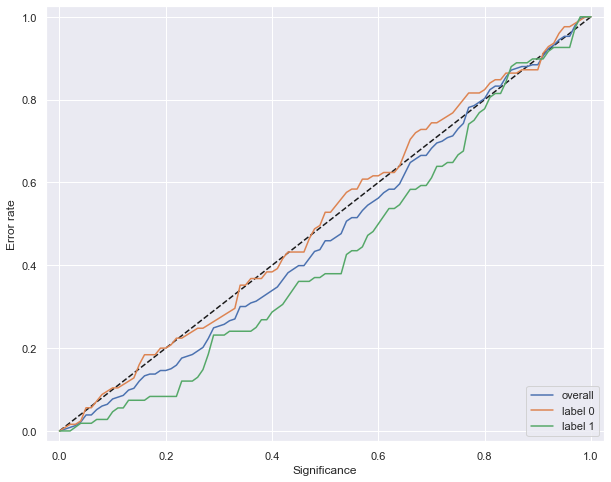

In [7]:
the_fig = plotting.plot_calibration_curve(true_lab, p_vals)

Plotting can also be done in a smaller range of significance values and has a few parameters to tweak the generated figure

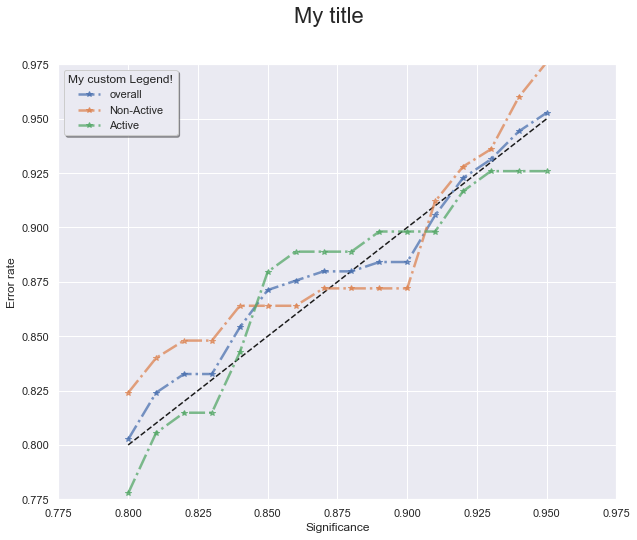

In [8]:
line_args = {'alpha': 0.75, 'marker':"*", 'linestyle': '-.', 'linewidth':2.5}

the_fig = plotting.plot_calibration_curve(true_lab, p_vals, sign_min=0.8, sign_max=.95, fig_padding=0.025,class_labels=["Non-Active", "Active"], **line_args)

# Set a custom title
the_fig.suptitle('My title', fontsize=22)

# Remove the old legend
import matplotlib.pyplot as plt
plt.gca().legend_.remove()

# Add a new (custom) legend
plt.legend(shadow=True,title='My custom Legend!')

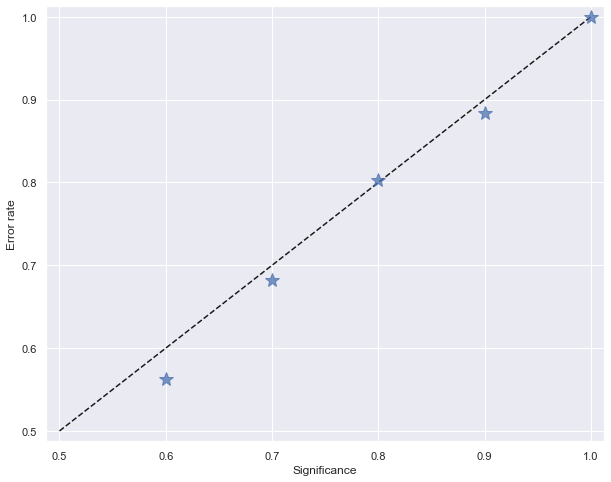

In [15]:
line_args = {'alpha': 0.75, 'marker':"*", 'ms': 15,'linestyle': 'None', 'linewidth':2.5}

the_fig = plotting.plot_calibration_curve(true_lab, p_vals, sign_min=0.5, sign_max=1, sign_step=0.1, class_labels=["Non-Active", "Active"],plot_all_labels=False, **line_args)

Clibration plot for a single class, note that we will get a warning from the underlying metric that computes the error-rate for each class

src/pharmbio/cp/metrics.py:37: RuntimeWarning: invalid value encountered in true_divide
  label_wise_erro_rate = np.array(label_wise_errors) / np.array(label_wise_counts)


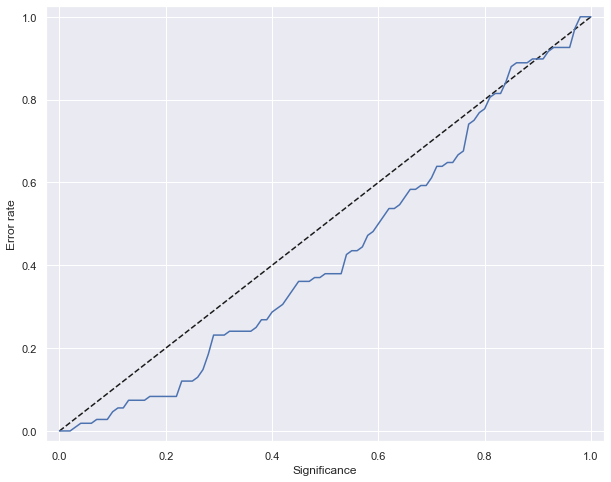

In [17]:
only_class_1 = (true_lab == 1)
true_1 = true_lab[only_class_1]
p_val_1 = p_vals[only_class_1]
the_fig = plotting.plot_calibration_curve(true_1, p_val_1, plot_all_labels=False)